In [109]:
# Import des librairies.
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import scipy.stats as ss  
import pingouin as pg
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import randint, uniform
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import ridge_regression, Lasso, Ridge

import random
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import itertools
import statsmodels.api as sm
from functions import * 
import locale
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
# Options d'affichage.

# Configuration du style de visualisation des graphiques avec un style personnel (pitayasmoothie-dark).
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

In [37]:
# Import des données
df = pd.read_csv("data_prepro/donnees_entrainement")
df_validation = pd.read_csv("data_prepro/donnees_validation")

df_light = pd.read_csv("data_prepro/donnees_entrainement_light")
df_validation_light = pd.read_csv("data_prepro/donnees_validation_light")

# Séparation des colonnes SKU, Date et DateLancement pour pouvoir les réutiliser lors des prédictions
sku_train = df[['SKU', 'Date', 'DateLancement']]
sku_validation = df_validation[['SKU', 'Date', 'DateLancement']]
sku_light_train = df_light[['SKU', 'Date', 'DateLancement']]
sku_light_validation = df_validation_light[['SKU', 'Date', 'DateLancement']]

# Suppression des colonnes SKU, Date et DateLancement des ensembles d'entraînement et de validation
df.drop(columns=['SKU', 'Date', 'DateLancement'], inplace=True)
df_validation.drop(columns=['SKU', 'Date', 'DateLancement'], inplace=True)
df_light.drop(columns=['SKU', 'Date', 'DateLancement'], inplace=True)
df_validation_light.drop(columns=['SKU', 'Date', 'DateLancement'], inplace=True)


## Train test split

In [38]:
# Division des données en ensemble d'entraînement et de test
X = df.drop(columns=['Prix'])  # Variables indépendantes
y = df['Prix']  # Variable dépendante
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Entrainement des modèles et évaluation de leur performance

## 1. Régression linéaire multiple

In [39]:
# Modèle de régression linéaire multiple sur l'ensemble d'entraînement
formula = 'Prix ~ ' + ' + '.join(X_train.columns)
model_lr = smf.ols(formula=formula, data=pd.concat([X_train, y_train], axis=1)).fit()

# Afficher les résultats du modèle
print(model_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 4.119e+05
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:50:03   Log-Likelihood:                 64432.
No. Observations:              128892   AIC:                        -1.288e+05
Df Residuals:                  128864   BIC:                        -1.285e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [40]:
# Colonnes à exclure
columns_to_exclude = [
    'Elasticite', 'ChocDemande', 'FacteurRarete', 'Categorie_Livres',
    'Categorie_Vetements','elasticite_cat_Inelastique', 'elasticite_cat_Neutre', 'year',
    'dayofweek', 'launch_dayofweek', 'launch_is_weekend', 'TempsDepuisLancement', 'is_weekend', 'TauxInflation', 'ChocDemandeCumulatif',
]

# Filtrer les données en excluant les colonnes définies
df2 = df.drop(columns=columns_to_exclude)
# Vérifier les colonnes restantes
print(df2.columns)
# Préparation des données pour la régression
X = df2.drop(columns=['Prix'])  # Variables indépendantes
y = df2['Prix']  # Variable dépendante

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


# Créer une formule pour la régression
formula = 'Prix ~ ' + ' + '.join(X_train.columns)

# Ajuster le modèle de régression linéaire multiple
model_lr = smf.ols(formula=formula, data=df2).fit()

# Afficher les résultats du modèle
print(model_lr.summary())

Index(['Prix', 'PrixInitial', 'NombreDeJoursEnRayon', 'ChangementPrix',
       'FacteurSaison', 'MarcheAleatoire', 'AgeProduitEnJours',
       'CategorieAgeProduit_Moyen', 'CategorieAgeProduit_Nouveau', 'Saison_2',
       'Saison_3', 'Saison_4', 'month', 'day', 'launch_year', 'launch_month',
       'launch_day'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 8.404e+05
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:50:04   Log-Likelihood:                 77823.
No. Observations:              161115   AIC:                        -1.556e+05
Df Residuals:                  161098   BIC:                        -1.554e+05
Df Model:                      

Test de linéarité


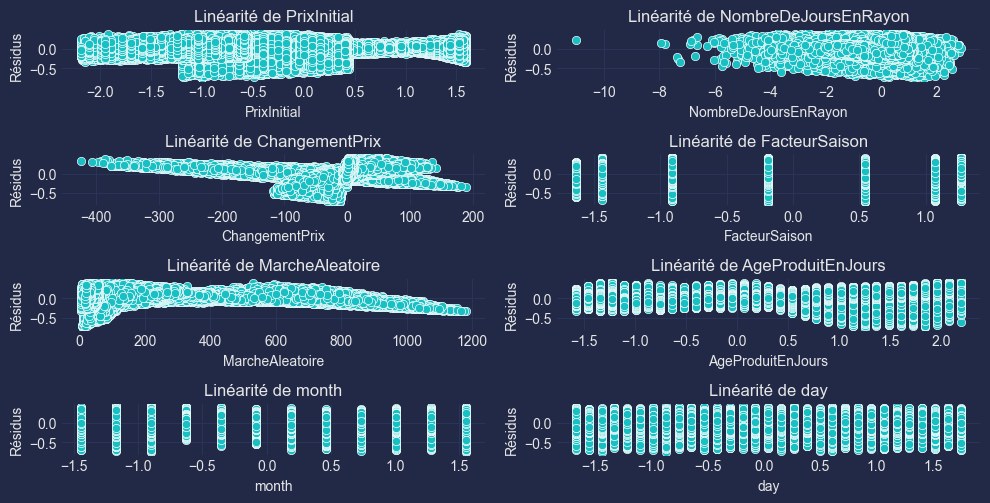

Test d'indépendance des erreurs


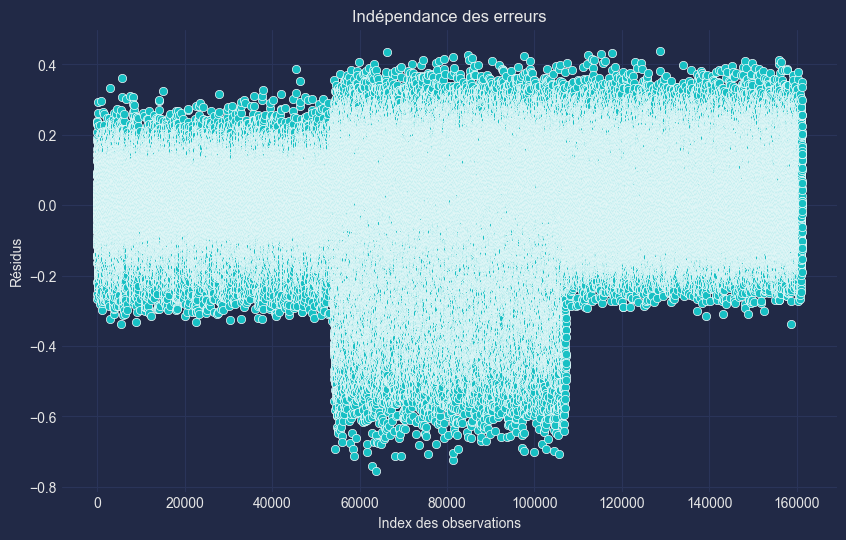

Test d'homoscédasticité


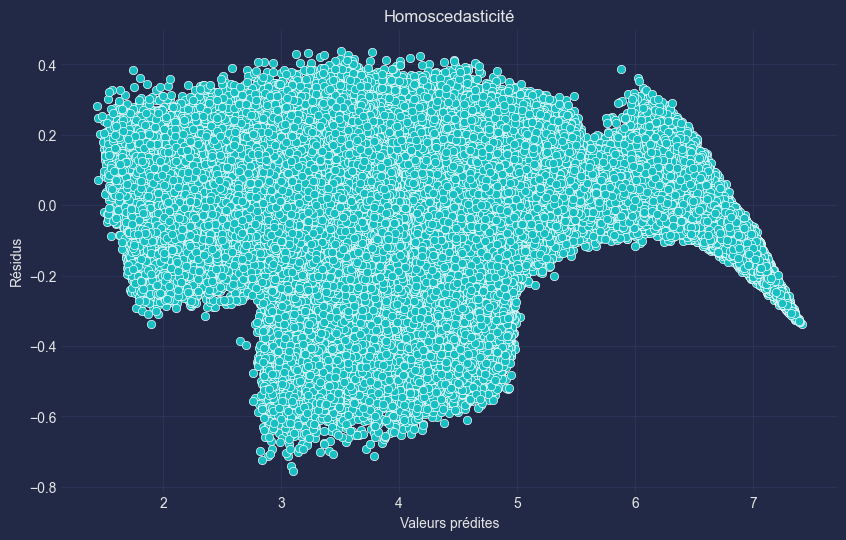

Test de normalité des erreurs


<Figure size 1000x600 with 0 Axes>

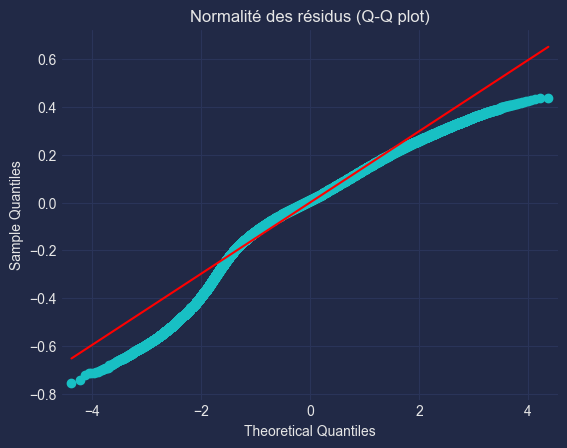

c:\Users\samir\Desktop\New Folder With Items\dpm-synthetiques\functions.py:663: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 161115.
  stat, p_value = shapiro(self.residuals)


Shapiro-Wilk test: p-value=6.449702287320081e-96
Kolmogorov-Smirnov test: p-value=0.0
D'Agostino's K-squared test: p-value=0.0
Test de multicolinéarité
                feature       VIF
0           PrixInitial  1.876059
1  NombreDeJoursEnRayon  1.307957
2        ChangementPrix  1.964463
3         FacteurSaison  1.216037
4       MarcheAleatoire  2.061528
5     AgeProduitEnJours  1.627878
6                 month  1.098204
7                   day  1.001675


In [41]:
model_lr = model_lr  
X = X  
y = y  
diagnostics = RegressionDiagnostics(model_lr, X, y)
diagnostics.run_all_diagnostics()

In [42]:
y_pred = model_lr.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


MSE: 0.02227857667045088
MAE: 0.11126375064796963
R²: 0.988199475459617


## 2. Random Forest

In [43]:
# Ajuster le modèle Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=17)
model_rf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_rf = model_rf.predict(X_test)

# Calculer les métriques de performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest R²: {r2_rf}')

Random Forest MSE: 1.5683324373145326e-08
Random Forest MAE: 3.274470116227852e-05
Random Forest R²: 0.999999991692851


In [44]:
# Définition des distributions de paramètres pour la recherche
param_dist = {
    'n_estimators': randint(50, 300),  # Réduction de la plage pour réduire le temps de calcul
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(5, 50),  # Réduction de la profondeur maximale
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Configuration de RandomizedSearchCV avec des paramètres optimisés pour les performances
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=17),
    param_distributions=param_dist,
    n_iter=20,  # Réduction du nombre d'itérations
    cv=3,  # Utilisation de la validation croisée à 3 plis
    verbose=1,  # Verbose réduit pour une sortie modérée
    n_jobs=-1,  # Utilisation de tous les cœurs disponibles pour accélérer
    random_state=17
)

# Ajustement du modèle
random_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres trouvés
print(f"Best parameters found: {random_search.best_params_}")

# Utilisation du meilleur modèle pour faire des prédictions
best_rf_model = random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calcul des métriques de performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest R²: {r2_rf}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'bootstrap': False, 'max_depth': 46, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 287}
Random Forest MSE: 8.316954621305626e-05
Random Forest MAE: 0.00523478203637174
Random Forest R²: 0.9999559467247114


## 3. **XGBoost**

In [45]:
# Définir la grille de recherche des hyperparamètres avec des plages optimisées
param_dist = {
    'n_estimators': randint(50, 300),  # Réduction de la plage pour alléger le calcul
    'learning_rate': uniform(0.01, 0.2),  # Plage ajustée pour une exploration ciblée
    'max_depth': randint(3, 7),  # Réduction de la profondeur maximale pour limiter la complexité
    'subsample': uniform(0.6, 0.4),  # Ajustement pour réduire la variance
    'colsample_bytree': uniform(0.6, 0.4),  # Plage réduite pour limiter la recherche
    'gamma': uniform(0, 0.3)  # Réduction de la plage pour une exploration plus ciblée
}

# Configurer RandomizedSearchCV avec des paramètres optimisés pour les performances
random_search = RandomizedSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=17),
    param_distributions=param_dist,
    n_iter=20,  # Réduction du nombre d'itérations
    cv=3,  # Utilisation de la validation croisée à 3 plis
    verbose=1,  # Verbose réduit pour des informations modérées
    n_jobs=-1,  # Utilisation de tous les cœurs disponibles pour accélérer
    random_state=17
)

# Ajustement du modèle
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best parameters found: {random_search.best_params_}")

# Utiliser le meilleur modèle pour faire des prédictions
best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Calculer les métriques de performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost MAE: {mae_xgb}')
print(f'XGBoost R²: {r2_xgb}')


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'colsample_bytree': 0.978273274727363, 'gamma': 0.018013404094615604, 'learning_rate': 0.18280842070924222, 'max_depth': 5, 'n_estimators': 269, 'subsample': 0.6204774662481815}
XGBoost MSE: 0.0001027495423162546
XGBoost MAE: 0.007717774460461746
XGBoost R²: 0.999945575585301


## 4. **Régression Ridge et Lasso**

In [13]:
# # Filtrer les colonnes pertinentes
# columns_to_keep = [
#     'Prix', 'PrixInitial', 'TauxInflation', 'FacteurSaison', 
#     'CategorieAgeProduit_Moyen', 'CategorieAgeProduit_Nouveau'
# ].copy()

# df_reg2 = df_reg[columns_to_keep]

# # Vérifier que toutes les colonnes sont présentes
# assert all(col in df_reg2.columns for col in columns_to_keep), "Certaines colonnes sont manquantes."

# # Division des données en ensembles d'entraînement et de test
# X = df_reg2.drop(columns=['Prix'])  # Variables indépendantes
# y = df_reg2['Prix']  # Variable dépendante

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardisation des données
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [46]:
# Modèle de régression Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

# Évaluation des performances du modèle Ridge
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)

print("Ridge Regression - R^2 Score:", ridge_r2)
print("Ridge Regression - RMSE:", ridge_rmse)

# Afficher les coefficients du modèle Ridge
ridge_coefficients = pd.Series(model_ridge.coef_, index=X.columns)
print("Coefficients du modèle Ridge :\n", ridge_coefficients)


Ridge Regression - R^2 Score: 0.9881976024486667
Ridge Regression - RMSE: 0.14927194239366723
Coefficients du modèle Ridge :
 PrixInitial                    1.341434
NombreDeJoursEnRayon           0.015894
ChangementPrix                 0.001440
FacteurSaison                  0.049783
MarcheAleatoire                0.000315
AgeProduitEnJours             -0.134347
CategorieAgeProduit_Moyen     -0.065609
CategorieAgeProduit_Nouveau   -0.200171
Saison_2                       0.007607
Saison_3                      -0.003359
Saison_4                      -0.004111
month                         -0.005120
day                           -0.000040
launch_year                    0.007913
launch_month                   0.008046
launch_day                     0.001105
dtype: float64


c:\Users\samir\anaconda3\envs\envsynth\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
# Modèle de régression Lasso
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

# Évaluation des performances du modèle Lasso
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)

print("Lasso Regression - R^2 Score:", lasso_r2)
print("Lasso Regression - RMSE:", lasso_rmse)

# Afficher les coefficients du modèle Lasso
lasso_coefficients = pd.Series(model_lasso.coef_, index=X.columns)
print("Coefficients du modèle Lasso :\n", lasso_coefficients)

Lasso Regression - R^2 Score: 0.9609995754126308
Lasso Regression - RMSE: 0.2713486917050398
Coefficients du modèle Lasso :
 PrixInitial                    0.882721
NombreDeJoursEnRayon          -0.000000
ChangementPrix                 0.001067
FacteurSaison                  0.000000
MarcheAleatoire                0.001751
AgeProduitEnJours             -0.000000
CategorieAgeProduit_Moyen      0.000000
CategorieAgeProduit_Nouveau    0.000000
Saison_2                       0.000000
Saison_3                      -0.000000
Saison_4                      -0.000000
month                         -0.000000
day                            0.000000
launch_year                    0.000000
launch_month                   0.000000
launch_day                    -0.000000
dtype: float64


c:\Users\samir\anaconda3\envs\envsynth\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
# Préparation des données pour la régression
X_with_const = sm.add_constant(X)
X_train_const, X_test_const = train_test_split(X_with_const, test_size=0.2, random_state=42)

# Ajustement du modèle de régression linéaire multiple
formula = 'Prix ~ ' + ' + '.join(X_train.columns)
model = smf.ols(formula=formula, data=pd.concat([X_train, y_train], axis=1)).fit()

# Afficher les résultats du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 6.718e+05
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:12:50   Log-Likelihood:                 62256.
No. Observations:              128892   AIC:                        -1.245e+05
Df Residuals:                  128875   BIC:                        -1.243e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## 5. **modèles d'arbres de décision**

In [18]:
# # Filtrer les colonnes pertinentes
# columns_to_keep = [
#     'Prix', 'PrixInitial', 'TauxInflation', 'FacteurSaison', 
#     'CategorieAgeProduit_Moyen', 'CategorieAgeProduit_Nouveau'
# ].copy()

# df_reg2 = df_reg[columns_to_keep]

# # Vérifier que toutes les colonnes sont présentes
# assert all(col in df_reg2.columns for col in columns_to_keep), "Certaines colonnes sont manquantes."

# # Division des données en ensembles d'entraînement et de test
# X = df_reg2.drop(columns=['Prix'])  # Variables indépendantes
# y = df_reg2['Prix']  # Variable dépendante

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Modèle d'arbre de décision pour la régression
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_tree = model_dt.predict(X_test)

# Évaluation des performances du modèle d'arbre de décision
tree_r2 = r2_score(y_test, y_pred_tree)
tree_rmse = mean_squared_error(y_test, y_pred_tree, squared=False)

print("Decision Tree Regression - R^2 Score:", tree_r2)
print("Decision Tree Regression - RMSE:", tree_rmse)

# Convertir les noms des colonnes en liste
feature_names = X.columns.tolist()

# # Visualiser l'arbre de décision
# plt.figure(figsize=(20, 10))
# plot_tree(model_dt, feature_names=feature_names, filled=True, rounded=True)
# plt.title("Arbre de Décision pour la Régression")
# plt.show()


Decision Tree Regression - R^2 Score: 0.999999990289496
Decision Tree Regression - RMSE: 0.00013539853022095054


c:\Users\samir\anaconda3\envs\envsynth\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
# Paramètres optimisés pour GridSearchCV sur une machine peu performante
param_grid = {
    'max_depth': [3, 5, 7],  # Réduction des valeurs testées
    'min_samples_split': [2, 5],  # Réduction du nombre de valeurs testées
    'min_samples_leaf': [1, 2]  # Réduction du nombre de valeurs testées
}

# Configuration de GridSearchCV avec une validation croisée à 3 plis
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,  # Réduction à 3 plis pour diminuer la charge de calcul
    n_jobs=-1,  # Utilisation de tous les cœurs disponibles pour accélérer
    verbose=2
)

# Ajustement du modèle
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et meilleur modèle
best_params = grid_search.best_params_
best_tree_model = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_best_tree = best_tree_model.predict(X_test)

# Évaluation des performances du meilleur modèle d'arbre de décision
best_tree_r2 = r2_score(y_test, y_pred_best_tree)
best_tree_rmse = mean_squared_error(y_test, y_pred_best_tree, squared=False)

print("Best Decision Tree Regression - R^2 Score:", best_tree_r2)
print("Best Decision Tree Regression - RMSE:", best_tree_rmse)

# # Visualisation du meilleur arbre de décision
# plt.figure(figsize=(20, 10))
# plot_tree(best_tree_model, feature_names=X.columns, filled=True, rounded=True)
# plt.title("Meilleur Arbre de Décision pour la Régression")
# plt.show()

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Decision Tree Regression - R^2 Score: 0.9999207132687997
Best Decision Tree Regression - RMSE: 0.012234699897463295


c:\Users\samir\anaconda3\envs\envsynth\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 6. **SARIMAX**

In [106]:
df_sarimax = pd.read_csv("data_prepro/donnees_entrainement")

In [107]:
# Conversion de la colonne 'Date' en type datetime et définition de l'index
df_sarimax['Date'] = pd.to_datetime(df_sarimax['Date'])
df_sarimax.set_index('Date', inplace=True)

# Vérification de la fréquence des données (facultatif)
df_sarimax_freq = pd.infer_freq(df_sarimax.index)
# Rééchantillonnage des données selon une fréquence mensuelle, en prenant la moyenne des valeurs pour chaque mois
df_sarimax_monthly = df_sarimax.resample('M').mean()

# Interpolation linéaire pour remplir les valeurs manquantes après rééchantillonnage
df_sarimax_monthly_interpolated = df_sarimax_monthly.interpolate(method='linear')

# Affichage des premières lignes des données rééchantillonnées pour vérifier le résultat
print(df_sarimax_monthly_interpolated.head())

# Vérification de la nouvelle fréquence des données
df_sarimax_freq = pd.infer_freq(df_sarimax_monthly_interpolated.index)
print(f"Nouvelle fréquence des données : {df_sarimax_freq}")


                Prix  PrixInitial  TempsDepuisLancement  NombreDeJoursEnRayon  \
Date                                                                            
2019-09-30  4.997189     0.171452             -1.583238             -0.756969   
2019-10-31  4.644753    -0.012351             -1.570127             -1.025911   
2019-11-30  4.672498    -0.010748             -1.558164             -1.019452   
2019-12-31  4.732721     0.025455             -1.526485             -1.006139   
2020-01-31  4.751550     0.010099             -1.474269             -0.999411   

            TauxInflation  Elasticite  ChocDemande  ChangementPrix  \
Date                                                                 
2019-09-30      -1.185558    0.299734     0.509750       19.479121   
2019-10-31      -1.185558    0.107824    -0.033297        0.081964   
2019-11-30      -1.185558    0.011673    -0.026163        3.794332   
2019-12-31      -1.185558    0.028387     0.015120        7.395539   
2020-01-31  

C:\Users\samir\AppData\Local\Temp\ipykernel_21832\587966888.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sarimax_monthly = df_sarimax.resample('M').mean()


<Figure size 1200x800 with 0 Axes>

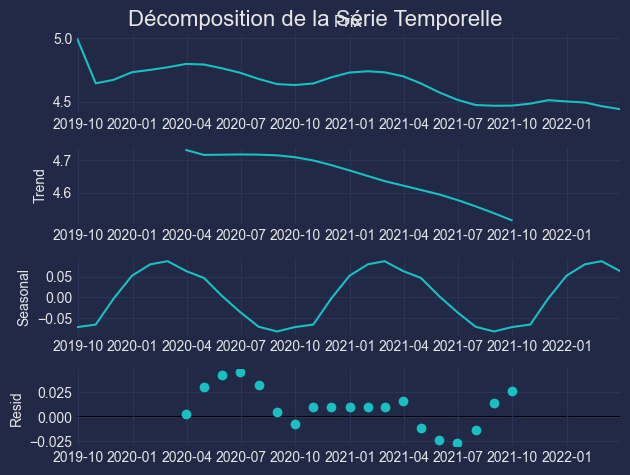

In [113]:
# Décomposition de la série temporelle pour analyser la tendance, la saisonnalité et les résidus
decomposition = seasonal_decompose(df_sarimax_monthly_interpolated['Prix'], model='additive', period=12)  # périodicité = 12 pour des données mensuelles

# Affichage des résultats de la décomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Décomposition de la Série Temporelle', fontsize=16)
plt.show()


In [114]:
# Appliquer le test de Dickey-Fuller sur la série temporelle (par exemple, sur la colonne 'Prix')
result = adfuller(df_sarimax_monthly_interpolated['Prix'])

# Afficher les résultats du test ADF
print('Statistique ADF :', result[0])
print('Valeur p :', result[1])
print('Nombre de décalages utilisés :', result[2])
print('Nombre d’observations :', result[3])
print('Valeurs critiques :')
for key, value in result[4].items():
    print(f'   {key}: {value:.3f}')


Statistique ADF : -0.21775801258614488
Valeur p : 0.936371541172307
Nombre de décalages utilisés : 4
Nombre d’observations : 26
Valeurs critiques :
   1%: -3.711
   5%: -2.981
   10%: -2.630


In [116]:
# Appliquer la première différenciation à la série temporelle
data_diff = df_sarimax_monthly_interpolated['Prix'].diff().dropna()

# Appliquer le test de Dickey-Fuller sur la série différenciée
result_diff = adfuller(data_diff)

# Afficher les résultats du test ADF après différenciation
print('Statistique ADF après différenciation :', result_diff[0])
print('Valeur p après différenciation :', result_diff[1])
print('Nombre de décalages utilisés :', result_diff[2])
print('Nombre d’observations :', result_diff[3])
print('Valeurs critiques :')
for key, value in result_diff[4].items():
    print(f'   {key}: {value:.3f}')


Statistique ADF après différenciation : -4.273741054185138
Valeur p après différenciation : 0.0004930942241838529
Nombre de décalages utilisés : 3
Nombre d’observations : 26
Valeurs critiques :
   1%: -3.711
   5%: -2.981
   10%: -2.630


In [117]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Définition des plages de paramètres
p = d = q = range(0, 3)  # Ordre non saisonnier
P = D = Q = range(0, 2)   # Ordre saisonnier
s = 12                    # Saison mensuelle

# Générer toutes les combinaisons de paramètres non saisonniers et saisonniers
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [s]))

# Initialiser les variables pour stocker les meilleurs résultats
best_aic = float('inf')
best_order = None
best_seasonal_order = None

# Boucle pour tester chaque combinaison de paramètres
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(df_sarimax_monthly_interpolated['Prix'], 
                            order=param, 
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            result = model.fit(disp=False)
            
            # Comparer les valeurs AIC pour trouver le meilleur modèle
            if result.aic < best_aic:
                best_aic = result.aic
                best_order = param
                best_seasonal_order = seasonal_param
        except Exception as e:
            continue  # Si une combinaison échoue, on la saute simplement

# Afficher les meilleurs paramètres trouvés
print(f'Meilleur modèle non saisonnier (p, d, q) : {best_order}')
print(f'Meilleur modèle saisonnier (P, D, Q, s) : {best_seasonal_order}')
print(f'Valeur AIC du meilleur modèle : {best_aic}')


c:\Users\samir\anaconda3\envs\envsynth\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\samir\anaconda3\envs\envsynth\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\samir\anaconda3\envs\envsynth\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\samir\anaconda3\envs\envsynth\lib\site-packages\statsmodels\tsa\sta

Meilleur modèle non saisonnier (p, d, q) : (1, 1, 1)
Meilleur modèle saisonnier (P, D, Q, s) : (0, 0, 0, 12)
Valeur AIC du meilleur modèle : -137.94169606203727


In [118]:
# Ajuster le modèle SARIMAX avec les meilleurs paramètres trouvés
model_optimal = SARIMAX(df_sarimax_monthly_interpolated['Prix'], 
                        order=(1, 1, 1), 
                        seasonal_order=(0, 0, 0, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

# Ajustement du modèle
sarimax_model_optimal = model_optimal.fit(disp=False)

# Afficher le résumé du modèle ajusté
print(sarimax_model_optimal.summary())


                               SARIMAX Results                                
Dep. Variable:                   Prix   No. Observations:                   31
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  71.971
Date:                Tue, 08 Oct 2024   AIC                           -137.942
Time:                        10:15:19   BIC                           -133.945
Sample:                    09-30-2019   HQIC                          -136.720
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6238      0.167      3.739      0.000       0.297       0.951
ma.L1          0.2603      0.130      1.996      0.046       0.005       0.516
sigma2         0.0003      0.000      2.623      0.0

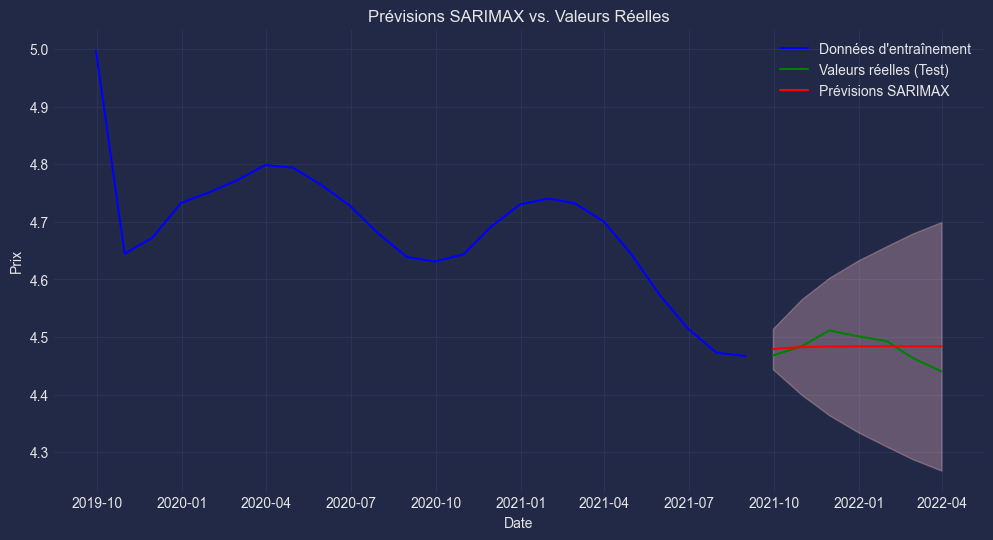

Erreur Quadratique Moyenne (MSE) : 0.00
Erreur Absolue Moyenne (MAE) : 0.02
Erreur Quadratique Moyenne (RMSE) : 0.02


In [121]:
# Séparer les données en ensemble d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
train_size = int(len(df_sarimax_monthly_interpolated) * 0.8)
train = df_sarimax_monthly_interpolated.iloc[:train_size]
test = df_sarimax_monthly_interpolated.iloc[train_size:]

# Ajuster le modèle SARIMAX avec les meilleurs paramètres trouvés sur l'ensemble d'entraînement
model_optimal = SARIMAX(train['Prix'], 
                        order=(1, 1, 1), 
                        seasonal_order=(0, 0, 0, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

# Ajustement du modèle
sarimax_model_optimal = model_optimal.fit(disp=False)

# Effectuer les prévisions sur l'ensemble de test
forecast = sarimax_model_optimal.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Tracer les prévisions et les intervalles de confiance
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Prix'], label='Données d\'entraînement', color='blue')
plt.plot(test.index, test['Prix'], label='Valeurs réelles (Test)', color='green')
plt.plot(forecast_values.index, forecast_values, label='Prévisions SARIMAX', color='red')
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Prévisions SARIMAX vs. Valeurs Réelles')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()


# Comparer les valeurs prédites aux valeurs réelles (sur la période de test)
mse = mean_squared_error(test['Prix'], forecast_values)
mae = mean_absolute_error(test['Prix'], forecast_values)
rmse = np.sqrt(mse)

print(f'Erreur Quadratique Moyenne (MSE) : {mse:.2f}')
print(f'Erreur Absolue Moyenne (MAE) : {mae:.2f}')
print(f'Erreur Quadratique Moyenne (RMSE) : {rmse:.2f}')


------------------------------------------------------------

# Prédictions

In [142]:
# Sélectionner une observation aléatoire à partir des colonnes SKU et Date stockées dans sku_train
random_index = random.randint(0, len(sku_train) - 1)
random_observation = sku_train.iloc[random_index]
random_sku = random_observation['SKU']
random_date = random_observation['Date']

# Ajouter la colonne Moving_Avg dans df pour une moyenne mobile
window_size = 3
df['Moving_Avg'] = df['Prix'].rolling(window=window_size).mean()

# Filtrer le DataFrame `sku_train` pour obtenir l'observation correspondante
# Utiliser l'indice de cette observation pour retrouver les données dans df
df_random_index = sku_train[(sku_train['SKU'] == random_sku) & (sku_train['Date'] == random_date)].index

# Vérifier que l'observation est unique
if len(df_random_index) != 1:
    raise ValueError("L'observation sélectionnée n'est pas unique.")

# Extraire l'indice de l'observation
index_random = df_random_index[0]

# Stocker le vrai prix à partir de l'indice dans df
y_actual_log = df.loc[index_random, 'Prix']
y_actual = np.exp(y_actual_log)  # Inverser la transformation logarithmique pour obtenir le prix réel

# Récupérer la ligne correspondante dans df_reg pour les prédictions
df_random_reg = df.loc[[index_random]].drop(columns=['Prix'])  # Suppression de la cible 'Prix'

# Comparer les colonnes de df_random_reg et X_train pour trouver les colonnes manquantes
missing_cols = set(X_train.columns) - set(df_random_reg.columns)

# Ajouter les colonnes manquantes avec des zéros pour assurer la compatibilité avec le modèle
for col in missing_cols:
    df_random_reg[col] = 0

# Assurer que l'ordre des colonnes est le même que dans X_train
df_random_reg = df_random_reg[X_train.columns]

# Prédictions avec les différents modèles
y_pred_lr_log = model_lr.predict(df_random_reg).tolist()[0]
y_pred_rf_log = best_rf_model.predict(df_random_reg).tolist()[0]
y_pred_xgb_log = best_xgb_model.predict(df_random_reg).tolist()[0]
y_pred_ridge_log = model_ridge.predict(df_random_reg).tolist()[0]
y_pred_lasso_log = model_lasso.predict(df_random_reg).tolist()[0]
y_pred_dt_log = best_tree_model.predict(df_random_reg).tolist()[0]

# Récupérer la valeur de Moving_Avg pour l'observation
y_pred_moving_avg_log = df.loc[index_random, 'Moving_Avg']
y_pred_moving_avg = np.exp(y_pred_moving_avg_log)  # Inverser la transformation logarithmique

# Inverser la transformation logarithmique pour obtenir les valeurs originales des prédictions
y_pred_lr = np.exp(y_pred_lr_log)
y_pred_rf = np.exp(y_pred_rf_log)
y_pred_xgb = np.exp(y_pred_xgb_log)
y_pred_ridge = np.exp(y_pred_ridge_log)
y_pred_lasso = np.exp(y_pred_lasso_log)
y_pred_dt = np.exp(y_pred_dt_log)

# Comparer les prédictions avec le vrai prix
print(f"SKU sélectionné: {random_sku}")
print(f"Date sélectionnée: {random_date}")
print(f"Prix réel: {y_actual}")
print(f"Prédiction Régression Linéaire (après transformation): {y_pred_lr}")
print(f"Prédiction Random Forest (après transformation): {y_pred_rf}")
print(f"Prédiction XGBoost (après transformation): {y_pred_xgb}")
print(f"Prédiction Moyenne Mobile (après transformation): {y_pred_moving_avg}")
print(f"Prédiction Ridge (après transformation): {y_pred_ridge}")
print(f"Prédiction Lasso (après transformation): {y_pred_lasso}")
print(f"Prédiction Decision Tree (après transformation): {y_pred_dt}")


SKU sélectionné: Livres_SKU_1038
Date sélectionnée: 2021-05-15 04:59:24.131828
Prix réel: 26.73345176373907
Prédiction Régression Linéaire (après transformation): 28.44698885059184
Prédiction Random Forest (après transformation): 26.74603025196965
Prédiction XGBoost (après transformation): 26.50330291171266
Prédiction Moyenne Mobile (après transformation): 29.55677862821992
Prédiction Ridge (après transformation): 28.45300602828825
Prédiction Lasso (après transformation): 31.64153615759317
Prédiction Decision Tree (après transformation): 26.477088574550088


In [143]:
# Créer le dossier 'models' s'il n'existe pas déjà
if not os.path.exists('models'):
    os.makedirs('models')

# Sérialiser les autres modèles existants dans le dossier 'models'
with open('models/model_lr.pkl', 'wb') as file:
    pickle.dump(model_lr, file)
with open('models/model_rf.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)
with open('models/best_xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)
with open('models/model_ridge.pkl', 'wb') as file:
    pickle.dump(model_ridge, file)
with open('models/model_lasso.pkl', 'wb') as file:
    pickle.dump(model_lasso, file)
with open('models/model_dt.pkl', 'wb') as file:
    pickle.dump(best_tree_model, file)
with open('models/sarimax_model.pkl', 'wb') as file:
    pickle.dump(sarimax_model, file)
